In [64]:
import lxml.html
import requests
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
import pandas as pd
from urllib.parse import urljoin
import numpy as np
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from time import sleep
from sklearn.feature_extraction.text import TfidfTransformer
import time

In [65]:
title1=pd.read_csv('레몬테라스멤버.csv')

In [66]:
title2=pd.read_csv('레몬테라스멤버2.csv')

In [67]:
comment1=pd.read_csv('레몬테라스멤버댓글.csv')

In [68]:
comment2=pd.read_csv('레몬테라스멤버댓글2.csv')

In [69]:
title1.drop('Unnamed: 0',axis=1, inplace=True)
title2.drop('Unnamed: 0',axis=1, inplace=True)
comment1.drop('Unnamed: 0',axis=1, inplace=True)
comment2.drop('Unnamed: 0',axis=1, inplace=True)

In [70]:
comment1.columns=['댓글']
comment2.columns=['댓글']

In [71]:
title=pd.concat([title1, title2],ignore_index=True)
comment=pd.concat([comment1,comment2],ignore_index=True)

In [72]:
title.loc[title.내용.isnull(),'내용']=''

In [73]:
comment.loc[comment.댓글.isnull(),'댓글']=''

In [74]:
title['제목']=title['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
title['제목']=title['제목'].str.replace('^ +', "")

title['내용']=title['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
title['내용']=title['내용'].str.replace('^ +', "")

In [75]:
comment['댓글']=comment['댓글'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거하는 정규 표현식/이모티콘,외국인이 쓴글들이 있음
comment['댓글']=comment['댓글'].str.replace('^ +', "")

In [76]:
comment1['댓글']

0       블로그후기 : https://blog.naver.com/ounji7/22255892...
1                                         불마왕라면이 있는지 몰랐어요
2       저도 해외라면 제법 먹어봤는데 한국께 제일 맛있는거 같아요 외국 친구들도 한국꺼 맛...
3       일본 예능프로인가요? 저 나라는 한국에 대해 관심이 참 많은 나라 같아요.. 각종 ...
4                             저는 여기있는 라면하나도 먹지를 못했네요 ㅠㅠㅠㅠ
                              ...                        
9761                                   ㅋㅋ아웅 사장님 넘 솔직하셧다ㅋㅋ
9762                                      ㅋㅋㅋ그쵸 너무 솔직하셨어요
9763                  맞아요 웃고 남겼을듯요 ㅋㅋㅋ\n앞에서는 맛있다고 해줬을텐뎈ㅋㅋ
9764                               헉 ,, 아내분이 보면 속상하겠어요 ㅠㅠ
9765                             속상은 하겠지만 맛이없는건 없는거니...ㅋㅋ
Name: 댓글, Length: 9766, dtype: object

In [77]:
comment['댓글']

0                                           블로그후기  인스타그램  
1                                          불마왕라면이 있는지 몰랐어요
2        저도 해외라면 제법 먹어봤는데 한국께 제일 맛있는거 같아요 외국 친구들도 한국꺼 맛...
3        일본 예능프로인가요 저 나라는 한국에 대해 관심이 참 많은 나라 같아요 각종 예능에...
4                              저는 여기있는 라면하나도 먹지를 못했네요 ㅠㅠㅠㅠ
                               ...                        
16222                                          저도 정보 부탁드려요
16223                                노랑노랑우비해조류비오틴 검색하면 나와요
16224    저 해조류비오틴 먹고있는데 좋아요 머리숱은 쪼끔 근데 머리뿌리쪽이 진짜 단단해지고 ...
16225       비ㅇ틴 남편이 먹고 있는데 먹지 말라고 해야겠네요 덕분에 정보 얻아갑니다 감사합니다
16226    그건 피부트러블 생기는 분들만 해당되는거 아닌가요 부작용으로 좁쌀 여드름 난다는 분...
Name: 댓글, Length: 16227, dtype: object

#### 형태소 분석

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [79]:
from kiwipiepy import Kiwi

In [80]:
import re

In [81]:
kiwi=Kiwi()
kiwi.prepare()

0

In [82]:
stopwords = set(['뭐','호',"거", "것","저","때",'이거','수','데','감','히','후','이','있','하','것','들','그','되','이','보','않','없','나','사람','주','아니','등','같','우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두','말하','알','그러나','받','못하','일'
,'그런','또','문제','더','사회','많','그리고','크','따르','나오','가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','자신','안','어떤','내','경우'
,'명','생각','시간','그녀','다시','이런','앞','보이','번','나','다른','어떻','여자','개','전','들','사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','에','저','분','중','듯','형','식','비','옆','돌','쟁','엄','남','요거','청','쪽','통','존','겹','조','광',])

In [83]:
token_re = re.compile(r'\b\w{2,}\b', re.UNICODE) #양끝단사이에 2글자 이상있는것을 다뽑아라 영어 뿐만아니라 한국어도 가능 1글자짜리 무시하는것

In [84]:
def tokenizer(text):
    words=[]
    result=kiwi.analyze(text)
    for token,pos,start,end in result[0][0]:
        if pos[0] in 'N' and token not in stopwords:
            for word in token_re.findall(token):
                words.append(word)
    return words

# 단어빈도분석

#### 제목 단어빈도

In [85]:
title['제목'][0]

'삼양식품 큰 컵 로제불닭볶음면  순하고 부드러운 로제불닭볶음면'

In [87]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf2=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm2=tfidf2.fit_transform(title['제목']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [88]:
words2= tfidf2.get_feature_names()

In [89]:
word_count2 = pd.DataFrame({
    '단어': words2,
    '빈도': tdm2.sum(axis=0).flat
})

word_sort2=word_count2.sort_values('빈도',ascending=False).head(30)
word_sort2['단어']=word_sort2.단어.str.split('/').str.get(0)
cleansing_word2=word_sort2

In [90]:
cleansing_word2

,단어,빈도
103,리뷰,80.836052
405,추천,45.973212
371,정리,45.267015
441,튜브,44.184639
49,노트,44.016412
440,토익,44.016412
118,만뷰,42.473411
400,체험,28.920036
10,건강,25.372520
495,후기,22.732164


In [106]:
skin_dic2=cleansing_word2.set_index('단어')['빈도'].to_dict()

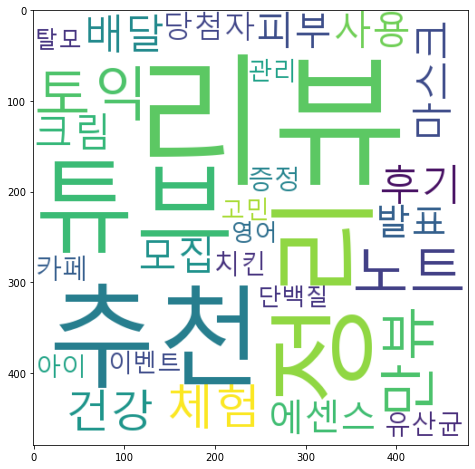

In [107]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(8,8))
wc2 = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc2.generate_from_frequencies(skin_dic2)

plt.imshow(wc2, interpolation='bilinear')

#### 내용 단어빈도

In [91]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf1=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm1=tfidf1.fit_transform(title['내용']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [92]:
words1= tfidf1.get_feature_names()

In [93]:
word_count1 = pd.DataFrame({
    '단어': words1,
    '빈도': tdm1.sum(axis=0).flat
})

word_sort1=word_count1.sort_values('빈도',ascending=False).head(30)
word_sort1['단어']=word_sort1.단어.str.split('/').str.get(0)
cleansing_word1=word_sort1

In [94]:
cleansing_word1
# 강의, 토익은 광고 느낌의 글로 중복되어 올라와 빈도수가 높은 것으로 보임
# 피부 마스크 크림
#느낌
#체험 이벤트 당첨자 
#아이 유산균 건강
#리뷰 후기 추천 고민 

,단어,빈도
377,제품,107.296783
119,리뷰,94.359584
463,피부,66.785423
441,토익,62.230962
495,후기,59.984713
196,사용,59.225208
402,체험,54.981119
11,강의,49.281302
351,작성,47.113484
265,아이,45.605075


In [108]:
skin_dic1=cleansing_word1.set_index('단어')['빈도'].to_dict()

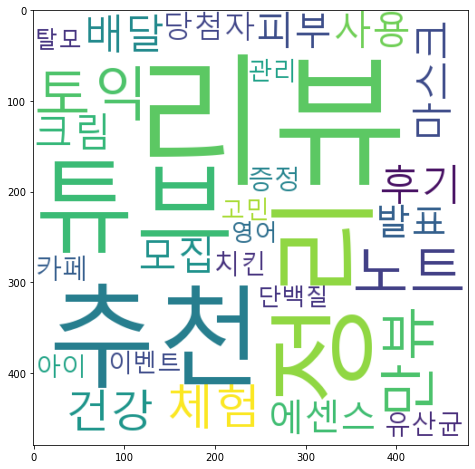

In [109]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(8,8))
wc1 = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc1.generate_from_frequencies(skin_dic1)

plt.imshow(wc2, interpolation='bilinear')

#### 댓글 단어빈도

In [96]:
##tfidf 이용 단어빈도 분석(클렌징폼)(tokenizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf3=TfidfVectorizer(max_features=500,tokenizer=tokenizer)
tdm3=tfidf3.fit_transform(comment['댓글']) #띄워쓰기를 기준으로 단어문서 행렬을 만듬

In [97]:
words3= tfidf3.get_feature_names()

In [98]:
word_count3 = pd.DataFrame({
    '단어': words3,
    '빈도': tdm3.sum(axis=0).flat
})

word_sort3=word_count3.sort_values('빈도',ascending=False).head(30)
word_sort3['단어']=word_sort3.단어.str.split('/').str.get(0)
cleansing_word3=word_sort3

In [99]:
cleansing_word3
#감사 축하 고민 - 공감하는 말투
#신청 완료 응모 참여 체험 - 체험단

#아이 남편 
#피부 관리 마스크 
#건강 관리 유산균 


,단어,빈도
9,감사,1325.121268
414,축하,682.836725
247,신청,581.454222
299,완료,408.679654
114,리뷰,334.967671
259,아이,291.790345
184,사용,261.115219
499,후기,249.583627
369,제품,247.453596
466,피부,247.413947


In [110]:
skin_dic3=cleansing_word3.set_index('단어')[ '빈도'].to_dict()

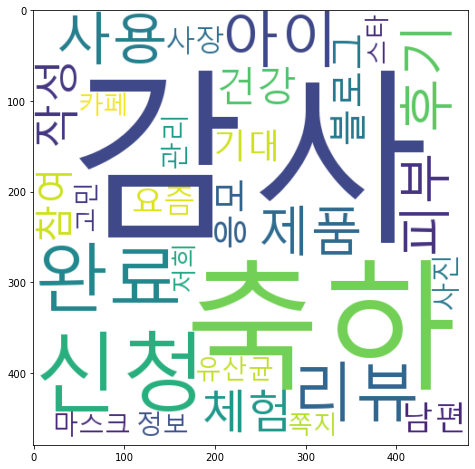

In [111]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(8,8))
wc3 = WordCloud(font_path ='C:/Windows/Fonts/Malgun.ttf',background_color="white", width = 480, height=480,max_words=30,contour_width=3, contour_color='steelblue')
wc3.generate_from_frequencies(skin_dic3)

plt.imshow(wc3, interpolation='bilinear')

***리뷰*** 뿐만 아니라 ***내돈내산*** 같은 다양한 키워드를 사용해 다양한 데이터를 크롤링 할 것이다.\
추후 리뷰를 직접 보며 라벨링을 진행하여 **감성분석**을 해 볼 것이고\
크롤링 데이터를 추가한 후 **주제분석**도 시도해 볼 예정이다.